<a href="https://colab.research.google.com/github/chirazkahla/TP-VI/blob/TP/tp4v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wbgapi

In [ ]:
# استيراد المكتبات الضرورية
import wbgapi as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx


In [ ]:
import wbgapi as wb
import pandas as pd

# 1️⃣ تحديد الدول والمؤشرات
countries = ['USA','CHN','IND','BRA','DEU','NGA','EGY','JPN','GBR','FRA','MEX','IDN']
indicators = {
    'NY.GDP.PCAP.CD': 'GDP_Per_Capita',
    'SP.DYN.LE00.IN': 'Life_Expectancy',
    'IT.NET.USER.ZS': 'Internet_Users_Pct',
    'SP.POP.TOTL': 'Population'
}

# 2️⃣ تحميل البيانات من 1963 إلى 2023
data_frames = []
for code, name in indicators.items():
    df_temp = wb.data.DataFrame(code, countries, time=range(1963, 2024)).reset_index()
    df_temp = df_temp.melt(id_vars=['economy'], var_name='Year', value_name=name)
    df_temp['Year'] = df_temp['Year'].astype(str).str.replace('YR','',regex=False).astype(int)
    data_frames.append(df_temp.drop(columns=['Indicator'], errors='ignore'))

# 3️⃣ دمج المؤشرات الأربعة في إطار واحد
df = data_frames[0]
for df_next in data_frames[1:]:
    df = pd.merge(df, df_next, on=['economy','Year'], how='outer')

# 4️⃣ إعادة تسمية الأعمدة
df = df.rename(columns={'economy':'ISO3'})

# 5️⃣ إضافة أسماء الدول والمناطق
meta = wb.economy.DataFrame(countries)[['region','name']]
meta = meta.reset_index().rename(columns={'id':'ISO3','region':'Region','name':'Country'})
df = df.merge(meta, on='ISO3', how='left')

# ✅ عرض النتائج
print("✅ تم تحميل البيانات من 1963 إلى 2023 بنجاح!")
print(df.head())
print("\n📋 نطاق السنوات:", df['Year'].min(), "→", df['Year'].max())


✅ تم تحميل البيانات من 1963 إلى 2023 بنجاح!
  ISO3  Year  GDP_Per_Capita  Life_Expectancy  Internet_Users_Pct  Population  \
0  BRA  1963      294.169619           54.452                 NaN  79164235.0   
1  BRA  1964      257.259727           54.848                 NaN  81488595.0   
2  BRA  1965      268.028761           55.243                 NaN  83817583.0   
3  BRA  1966      328.343792           55.625                 NaN  86139359.0   
4  BRA  1967      351.472600           56.016                 NaN  88446124.0   

  Region Country  
0    LCN  Brazil  
1    LCN  Brazil  
2    LCN  Brazil  
3    LCN  Brazil  
4    LCN  Brazil  

📋 نطاق السنوات: 1963 → 2023


In [ ]:
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ISO3                732 non-null    object 
 1   Year                732 non-null    int64  
 2   GDP_Per_Capita      728 non-null    float64
 3   Life_Expectancy     732 non-null    float64
 4   Internet_Users_Pct  393 non-null    float64
 5   Population          732 non-null    float64
 6   Region              732 non-null    object 
 7   Country             732 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 45.9+ KB


In [ ]:
df.describe()

,Year,GDP_Per_Capita,Life_Expectancy,Internet_Users_Pct,Population
count,732.000000,728.000000,732.000000,393.000000,7.320000e+02
mean,1993.000000,11787.371985,68.008283,35.961125,2.716371e+08
std,17.618856,16073.721585,10.809095,33.748536,3.657742e+08
min,1963.000000,53.205187,37.497000,0.000000,2.909187e+07
25%,1978.000000,747.155333,61.213750,2.040000,6.754635e+07
50%,1993.000000,3190.059103,70.809756,26.325900,1.156292e+08
75%,2008.000000,17475.692340,75.998476,71.000000,2.298174e+08
max,2023.000000,82304.620427,84.560000,96.298900,1.438070e+09


In [ ]:
df.isna().sum()

,0
ISO3,0
Year,0
GDP_Per_Capita,4
Life_Expectancy,0
Internet_Users_Pct,339
Population,0
Region,0
Country,0


📅 آخر سنة فيها بيانات فعلية: 2023
عدد الدول: 12


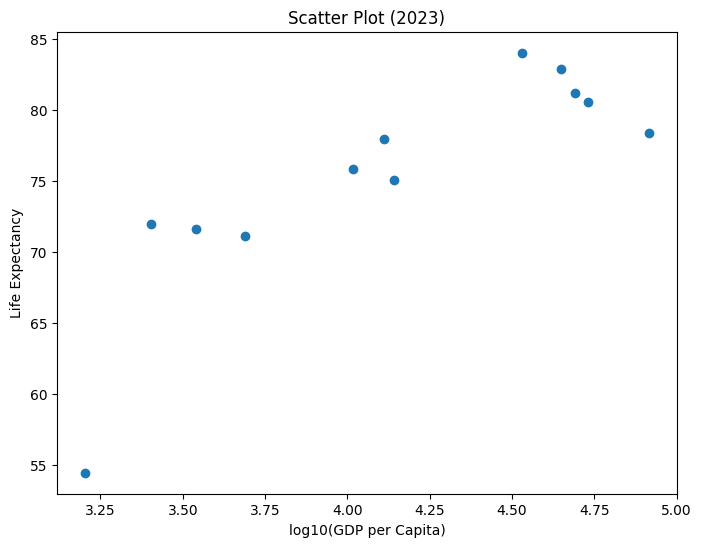

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# نختار آخر سنة تحتوي فعلاً على بيانات غير مفقودة لـ GDP_Per_Capita و Life_Expectancy
latest_year = df.dropna(subset=['GDP_Per_Capita', 'Life_Expectancy'])['Year'].max()
recent = df[df['Year'] == latest_year]

print("📅 آخر سنة فيها بيانات فعلية:", latest_year)
print("عدد الدول:", len(recent))


# 1️⃣ Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(np.log10(recent['GDP_Per_Capita']), recent['Life_Expectancy'])
plt.xlabel("log10(GDP per Capita)")
plt.ylabel("Life Expectancy")
plt.title(f"Scatter Plot ({latest_year})")
plt.show()





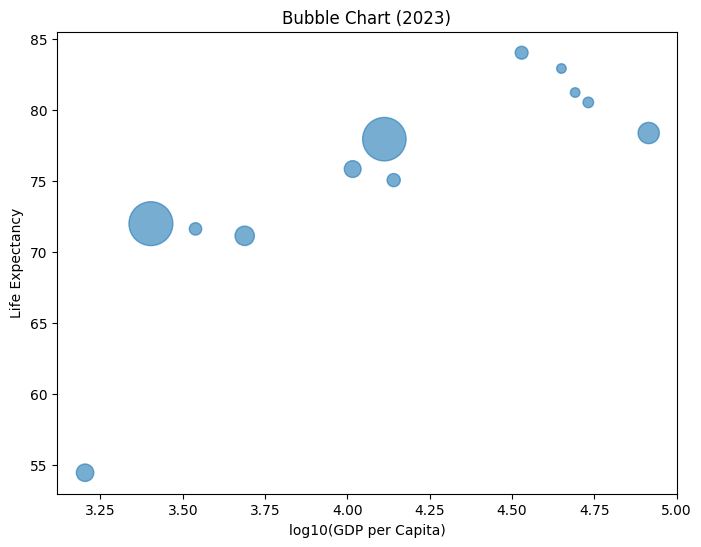

In [ ]:
# 2️⃣ Bubble Chart (الحجم = عدد السكان)
plt.figure(figsize=(8,6))
sizes = (recent['Population'] / recent['Population'].max()) * 1000
plt.scatter(np.log10(recent['GDP_Per_Capita']), recent['Life_Expectancy'], s=sizes, alpha=0.6)
plt.xlabel("log10(GDP per Capita)")
plt.ylabel("Life Expectancy")
plt.title(f"Bubble Chart ({latest_year})")
plt.show()

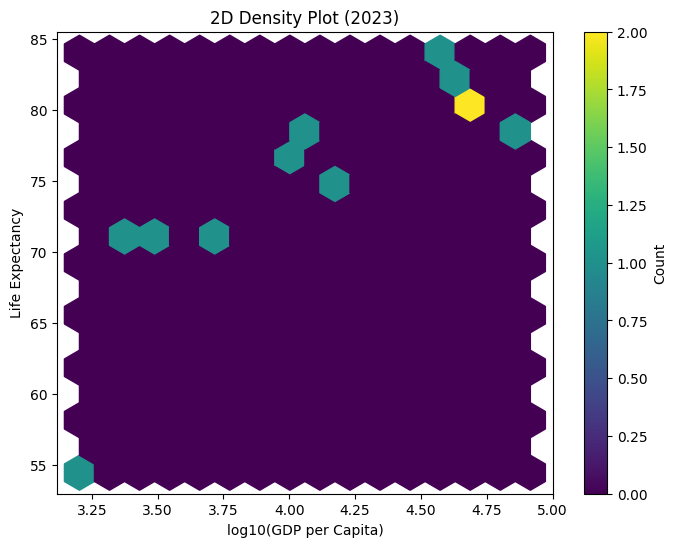

In [ ]:
# 3️⃣ Density Plot (Hexbin)
plt.figure(figsize=(8,6))
plt.hexbin(np.log10(recent['GDP_Per_Capita']), recent['Life_Expectancy'], gridsize=15)
plt.colorbar(label='Count')
plt.xlabel("log10(GDP per Capita)")
plt.ylabel("Life Expectancy")
plt.title(f"2D Density Plot ({latest_year})")
plt.show()



- **Scatter Plot:**  
  يُظهر العلاقة البسيطة بين الناتج المحلي للفرد والعمر المتوقع.  
  الاتجاه العام واضح (كلما ارتفع الدخل، ارتفع العمر المتوقع)،  
  لكنه لا يوضّح حجم التأثير السكاني للدول.

- **Bubble Chart:**  
  يضيف البعد الثالث (عدد السكان)، ويُظهر بوضوح أن بعض الدول متوسطة الدخل  
  مثل الصين والهند لها وزن سكاني كبير يؤثر على المتوسط العالمي للعمر المتوقع.  
  هذا الرسم هو الأنسب لعرض الرسالة التحليلية المطلوبة.

- **Density Plot (Hexbin):**  
  يركّز على مناطق تمركز البيانات ويُظهر التجمعات السكانية،  
  لكنه يخفي التفاصيل الفردية لكل دولة.

### 🎯 **الاستنتاج:**  
الرسم الأنسب للتعبير عن الظاهرة هو **Bubble Chart**  
لأنه يوضّح أن *الدول الفقيرة متفاوتة في العمر المتوقع،  
لكن الدول متوسطة الدخل ذات السكان الكثيفين تؤثر أكثر على المتوسط العالمي.*


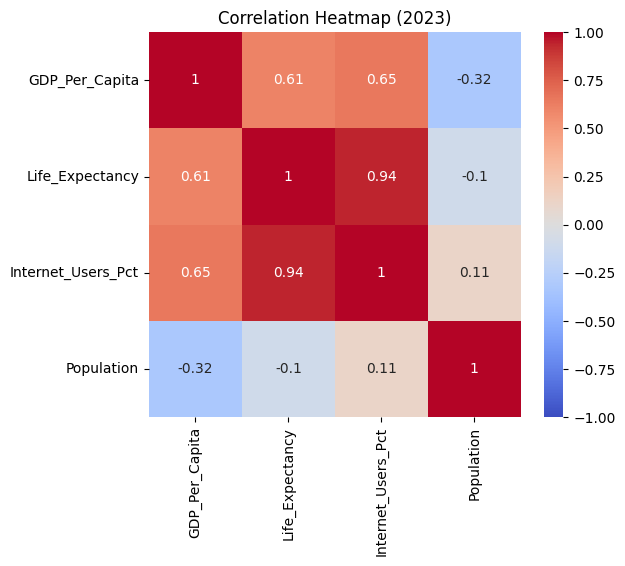

In [ ]:
# 🔥 خريطة الارتباط بين المؤشرات الأساسية
import seaborn as sns

corr = recent[['GDP_Per_Capita','Life_Expectancy','Internet_Users_Pct','Population']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Correlation Heatmap ({latest_year})')
plt.show()



- أقوى ارتباط إيجابي يظهر بين **GDP_Per_Capita** و **Internet_Users_Pct**،  
  مما يعني أن زيادة الدخل ترتبط بزيادة انتشار الإنترنت والتطور التقني.

- توجد علاقة إيجابية واضحة أيضًا بين **GDP_Per_Capita** و **Life_Expectancy**،  
  أي أن الدول ذات الدخل الأعلى تمتلك صحة أفضل ومتوسط عمر أطول.

- بينما لا يظهر ارتباط قوي بين **Population** وبقية المتغيرات،  
  لأن عدد السكان لا يعكس بالضرورة مستوى التنمية أو الرفاه.

###  **الاستنتاج:**  
البيانات تدعم فرضية أن النمو الاقتصادي والتطور التقني يؤديان إلى تحسين الصحة العامة وزيادة العمر المتوقع.


In [ ]:
import plotly.express as px

fig = px.line(
    df[df['Country'].isin(['United States','India'])],
    x='Year', y='GDP_Per_Capita',
    color='Country',
    title='GDP per Capita Over Time: USA vs India'
)
fig.show()



- الرسم يوضح تطور **GDP per Capita** عبر الزمن لدولتين:  
  **الولايات المتحدة (دولة متقدمة)** و **الهند (دولة نامية)**.

- نلاحظ أن الولايات المتحدة تمتلك دخلًا مرتفعًا ومستقرًا على مدى العقود،  
  بينما الهند شهدت نموًا سريعًا بعد عام 2000 لكنها لا تزال أقل بكثير من المستوى الأمريكي.

### **الاستنتاج:**  
رغم النمو المتسارع في بعض الدول النامية،  
إلا أن الفجوة الاقتصادية بينها وبين الدول المتقدمة ما زالت واضحة.


In [ ]:
import folium

# آخر سنة في البيانات
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]

# إنشاء الخريطة
m = folium.Map(location=[20, 0], zoom_start=2)
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json',
    data=df_latest,
    columns=['Country', 'Life_Expectancy'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    legend_name='Life Expectancy (Years)'
).add_to(m)

# إضافة معلومات عند تمرير الماوس
for _, row in df_latest.iterrows():
    folium.Marker(
        location=[0, 0],
        popup=f"{row['Country']}: {row['Life_Expectancy']:.1f} years"
    )

m


| النوع       | الأفضل لـ              | الشكل        | الأداة             |
| ----------- | ---------------------- | ------------ | ------------------ |
| Choropleth  | توزيع القيم حسب الدول  | ألوان        | Folium / Plotly    |
| Marker      | مواقع محددة            | نقاط         | Folium / Plotly    |
| Bubble      | مقارنة قيم على الخريطة | دوائر        | Plotly             |
| Heatmap     | كثافة التوزيع          | ألوان حرارية | Folium             |
| Flow        | حركة أو اتجاه          | أسهم/خطوط    | Plotly / Kepler.gl |
| 3D Map      | عرض تفاعلي متقدم       | أعمدة ثلاثية | Kepler.gl          |
| Network Map | العلاقات بين المناطق   | عقد وحواف    | NetworkX           |



- الخريطة تُظهر توزيع **العمر المتوقع (Life Expectancy)** حسب الدول.  
- أوروبا وأمريكا الشمالية تتميز بعمر متوقع مرتفع (أكثر من 75 سنة).  
- إفريقيا جنوب الصحراء تُظهر أدنى معدلات للعمر المتوقع.  
- آسيا تشهد تباينًا واضحًا بين الدول المتقدمة (اليابان، كوريا) والدول النامية (الهند، إندونيسيا).

###  **الاستنتاج:**  
توجد فجوة صحية واضحة بين الدول المتقدمة والنامية،  
ويُعتبر العمر المتوقع مؤشرًا قويًا على مستوى التنمية البشرية.


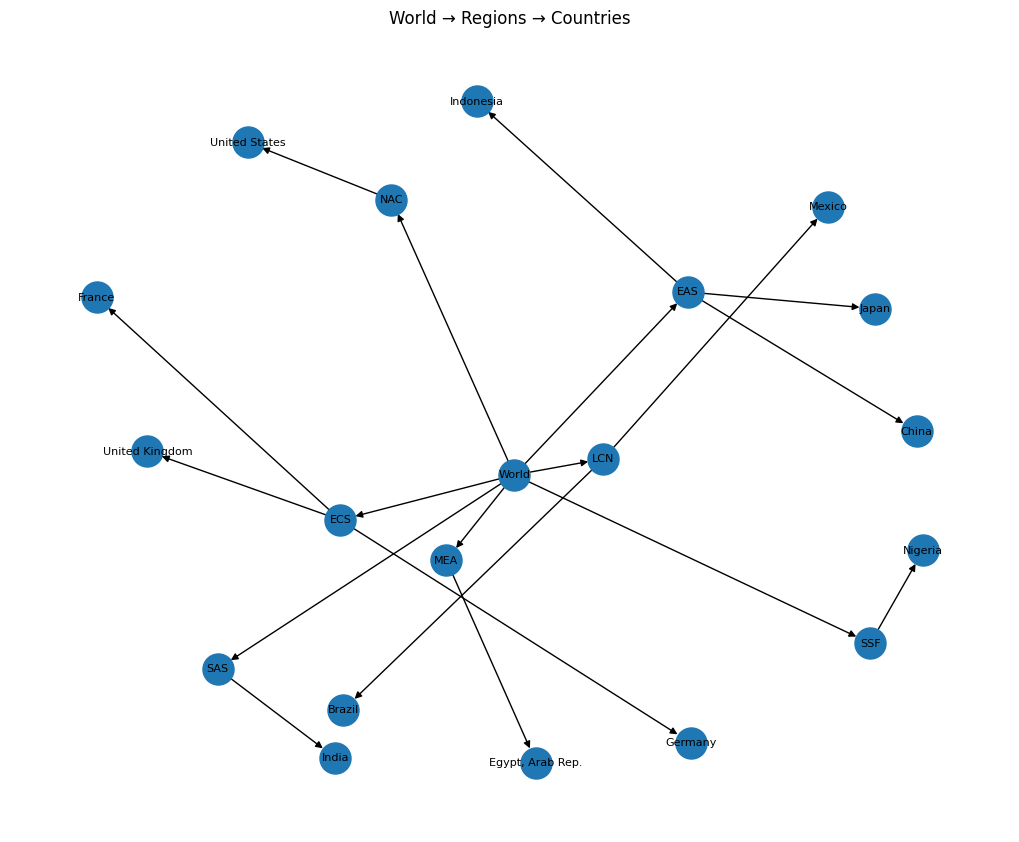

In [ ]:
# 🕸️ رسم شبكة العالم ← المناطق ← الدول
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("World", level=0)

# إضافة المناطق
for region in df['Region'].unique():
    G.add_node(region, level=1)
    G.add_edge("World", region)

# إضافة الدول إلى كل منطقة
for _, row in recent.iterrows():
    G.add_node(row['Country'], level=2)
    G.add_edge(row['Region'], row['Country'])

# رسم الشبكة
pos = nx.spring_layout(G, k=0.7, iterations=50)
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8)
plt.title("World → Regions → Countries")
plt.show()



- تمثل العقدة المركزية **World** المستوى الأعلى (العالم).  
- تتفرع منها المناطق الإقليمية (مثل NAC، EAS، LCN، SAS، MEA...).  
- ومن كل منطقة تتفرع الدول التابعة لها.

### 💬 **التحليل:**
- يساعد هذا التمثيل في فهم الهيكل الهرمي للبيانات العالمية.  
- يمكن لاحقًا استخدامه لعرض العلاقات الاقتصادية أو التجارية بين الدول.  
- مثال: منطقة **EAS** تضم الصين واليابان وإندونيسيا، بينما **MEA** تضم مصر.

### 🌐 **الاستنتاج:**  
الشبكة تُظهر بوضوح التنظيم الجغرافي للعالم حسب مناطق البنك الدولي،  
وهي قاعدة مفيدة لأي تحليل مقارن بين الأقاليم.




###  **النتائج الأساسية**
- ارتفاع الدخل يرتبط بزيادة العمر المتوقع واستخدام الإنترنت.  
- التفاوت بين الدول ما زال كبيرًا رغم النمو في بعض الدول النامية.  
- الأدوات التفاعلية والجغرافية (Plotly و Choropleth) قدّمت رؤية أكثر وضوحًا من الرسوم الثابتة.  
- تمثيل الشبكة (NetworkX) قدّم فهمًا هيكليًا للعلاقات الإقليمية بين الدول.
###  **الاستنتاج العام**
اختيار الرسم المناسب يعتمد على هدف التحليل:  
- الرسوم الثابتة (Scatter/Bubble) لعرض العلاقات.  
- الرسوم التفاعلية (Plotly) لعرض التطور الزمني.  
- الخرائط (Choropleth) للفهم الجغرافي.  
- الشبكات (NetworkX) للعلاقات الهيكلية.

---


